# **Titanic - Machine Learning from Disaster (Beginner's Approach)**
## Overview
The data has been splitted into two csv files:
* train.csv
* test.csv

According to the given instructions, **the training set** should be used to build the machine learning model. On the other hand, **the test set** will be used to see how well the model performs on unseen data. Moreover, the predictions must be saved in another csv file.

## Variable notes
**pclass**: A proxy for socio-economic status
* 1 = Upper Class
* 2 = Middle Class
* 3 = Lower Class

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Workflow for predicting
* Importing datasets
* Analyze the train dataset
* Analyze the test dataset
* Handling Null Values
* Analyze descriptive statistics
* Analyze Features through visualizations
* Correlation Analysis
* Data Preprocessing
* Model Training and Evaluation
* Conclusion
* Importing predicted values to submission.csv

## Importing datasets

In [1]:
# Import libraries
# for data analysis and wrangling
import numpy as np
import pandas as pd

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
%matplotlib inline

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import train and test dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

## Analyze the train dataset

In [3]:
# View first five rows of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Display the shape of the train dataset, columns, and their corresponding data types. 

In [4]:
# Display the shape of the train dataset
train.shape

(891, 12)

In [5]:
# Display the columns present in train dataset
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
# Display the data types for each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The train dataset has 891 entries and 12 columns. The columns include 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'. 

In addition, the following list are the columns present in the dataset, as well as their corresponding datatypes.
* PassengerId - integer
* Survived - integer
* Pclass - integer
* Name - object
* Sex - object
* Age - float
* SibSp - integer
* Parch - integer
* Ticket - object
* Fare - float
* Cabin - object
* Embarked - object

## Analyze the test dataset

In [7]:
# View first five rows of the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Display the shape of the test dataset, columns, and their corresponding data types. 

In [8]:
# Display the shape of the test dataset
test.shape

(418, 11)

In [9]:
# Display the columns present in test dataset
test.columns.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [10]:
# Display the data types for each column
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The test dataset has 418 entries with 11 columns. Mostly the columns in test dataset have similar data types as train dataset.

**Observations**
* Our target value (y) must be the column 'Survived'.
* The total samples in the train dataset are 891 or 40% of the actual number of passengers which is 2,240.
* Logically speaking, the passengers' ids does not have nothing to do whether the passneger survives or not.
* Features are split into numerical and categorical. In addition, there are some columns that have mix types of data.

**Decisions**
* We can set 'Survived' as our target value (y).
* Drop the column 'PassengerId' since it does not have anything to do with the target value.
* Use Data preprocessing techniques such as One Hot Encoder for categorical features.

## Handling Null Values

Determine how many null values exist in each feature.

In [11]:
# Null values for train and test dataset
print('Null values for train dataset')
print(train.isnull().sum())
print('-'*35)
print('Null values for train dataset')
print(test.isnull().sum())

Null values for train dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------------------------------
Null values for train dataset
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Observations**
* For the train dataset, the features that have null values are: 'Age', 'Cabin', and 'Embarked'
* For the test dataset, the features that have null values are: 'Age' and 'Cabin'.

**Decisions**
* For the missing values, the most effective way we can do is to impute the null values with Mean, Median, or Mode to yield a much better performance score for our models.
* The null values in columns Cabin and Embarked will be fill by the mode.
* The null values in column Age will be fill by the mean.

Interpolate Age linearly to fill out null values

In [12]:
# Interpolate age and fare to fill out null values
train['Age'].interpolate(method = 'linear', limit_direction = 'forward', inplace = True)
test['Age'].interpolate(method = 'linear', limit_direction = 'forward', inplace = True)
test['Fare'].interpolate(method = 'linear', limit_direction = 'forward', inplace = True)

print(f'Null values in feature Age in train dataset: {train.Age.isnull().sum()}')
print(f'Null values in feature Age in test dataset: {test.Age.isnull().sum()}')
print(f'Null values in feature Fare in test dataset: {test.Fare.isnull().sum()}')

Null values in feature Age in train dataset: 0
Null values in feature Age in test dataset: 0
Null values in feature Fare in test dataset: 0


Get the mode for both Cabin and Embarked columns and use them to replace null values.

In [13]:
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace = True)
test['Cabin'].fillna(train['Cabin'].mode()[0], inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

print(f'Null values in feature Cabin in train dataset: {train.Cabin.isnull().sum()}')
print(f'Null values in feature Cabin in test dataset: {test.Cabin.isnull().sum()}')
print(f'Null values in feature Embarked in train dataset: {train.Embarked.isnull().sum()}')

Null values in feature Cabin in train dataset: 0
Null values in feature Cabin in test dataset: 0
Null values in feature Embarked in train dataset: 0


In [14]:
# Null values for train and test dataset
print('Null values for train dataset')
print(train.isnull().sum())
print('-'*35)
print('Null values for train dataset')
print(test.isnull().sum())

Null values for train dataset
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
-----------------------------------
Null values for train dataset
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Analyze descriptive statistics

Describe the train dataset using descriptive statistcs.

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analayze features through visualizations

* Determine the count of survived per sex, pclass, and embarked.
* Determine the distribution of numerical features.

#### Number of Survivors per Sex

In [16]:
survivors_df = train.copy()

survivors_df['Survived'].replace([0], 'Not Survived', inplace = True)
survivors_df['Survived'].replace([1], 'Survived', inplace = True)

fig = px.histogram(survivors_df, x = 'Sex', color = 'Survived', 
                   barmode = 'group', title = 'Survivors by Sex')
fig.show()

#### Number of Survivors by Class

In [17]:
fig = px.histogram(survivors_df, x = 'Pclass', color = 'Survived', 
                   barmode = 'group', title = 'Survivors by Class')
fig.show()

#### Number of Survivors by Embarked

In [18]:
fig = px.histogram(survivors_df, x = 'Embarked', color = 'Survived', 
                   barmode = 'group', title = 'Survivors by Embarked')
fig.show()

**Observations**
* There are a lot of male casualties in the data, whereas the number of female survivors are much greater.
* Most of the casualties are poor since they have the highest death count of 372.
* Most number of casualties and survivors are embarked to Southampton.

**Decisions**
* Consider applying Label Encoder or One Hot Encoder to the Categorical features.

#### Distribution of Numerical Features

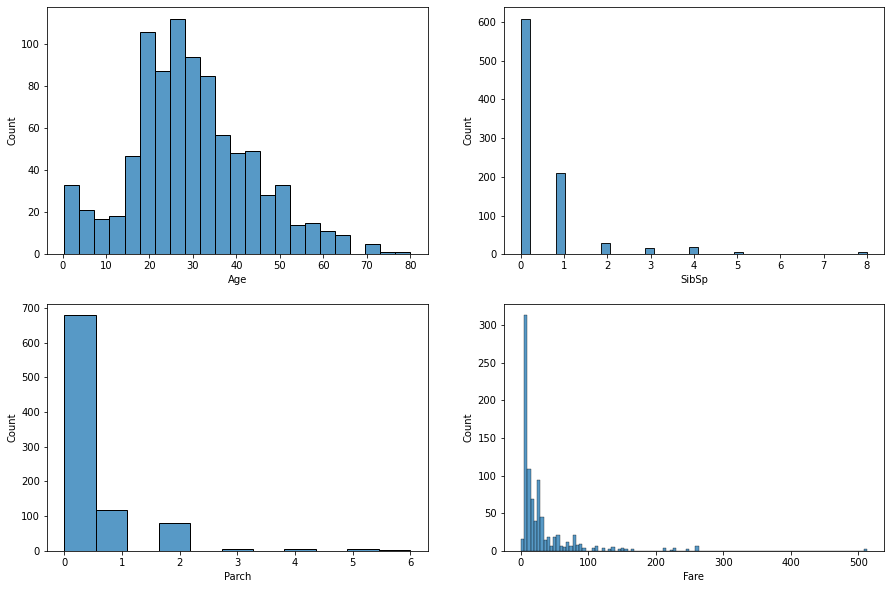

In [19]:
# Distribution of numerical features in the data
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(len(train[num_features].columns)//2, 2, figsize=(15, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.histplot(train[num_features[i]], ax = axis)
        i = i+1

**Observations**
* The distribution of the feature 'Age' is even. 
* The features 'SibSp', 'Parch', and 'Fare' are mostly skewed right.

**Decisions**
* Consider creating another feature 'is_alone' for Parch and SibSp.
* Consider on dropping columns who does not affect the target value.

In [20]:
combined_df = [train, test]
for df in combined_df:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['Is_Alone'] = 0
    
    # If column FamilySize is 1, then the person is alone
    df.loc[df['FamilySize'] == 1, 'Is_Alone'] = 1

# Drop SibSp, Parch, and FamilySize
train.drop(columns = ['SibSp', 'Parch', 'FamilySize'], inplace = True)
test.drop(columns = ['SibSp', 'Parch', 'FamilySize'], inplace = True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,B96 B98,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,B96 B98,S,1


In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Is_Alone
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,B96 B98,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,B96 B98,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,B96 B98,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,B96 B98,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,B96 B98,S,0


Drop the columns 'Name', 'Ticket', and 'Cabin'

In [23]:
# Drop 'Name', 'Ticket', and 'Cabin'
train.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)
test.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)
combined_df

[     PassengerId  Survived  Pclass     Sex   Age     Fare Embarked  Is_Alone
 0              1         0       3    male  22.0   7.2500        S         0
 1              2         1       1  female  38.0  71.2833        C         0
 2              3         1       3  female  26.0   7.9250        S         1
 3              4         1       1  female  35.0  53.1000        S         0
 4              5         0       3    male  35.0   8.0500        S         1
 ..           ...       ...     ...     ...   ...      ...      ...       ...
 886          887         0       2    male  27.0  13.0000        S         1
 887          888         1       1  female  19.0  30.0000        S         1
 888          889         0       3  female  22.5  23.4500        S         0
 889          890         1       1    male  26.0  30.0000        C         1
 890          891         0       3    male  32.0   7.7500        Q         1
 
 [891 rows x 8 columns],
      PassengerId  Pclass     Sex   A

## Data Preprocessing

In [24]:
X_train = train.drop(columns = ['PassengerId', 'Survived']).copy()
y_train = train['Survived']

Use label encoder to columns Sex and Embarked since they both contain nominal values.

In [25]:
cat_columns = ['Sex', 'Embarked']
new_col = []
le = LabelEncoder()

for col in cat_columns:
    new_X_train = le.fit_transform(X_train[col])
    new_col.append(new_X_train)

new_df_train = pd.DataFrame({'Is_Male' : new_col[0], 'Enc_Embarked' : new_col[1]})
X_train = pd.concat([X_train, new_df_train], axis = 1)
X_train.drop(columns = cat_columns, inplace = True)
X_train.head()

,Pclass,Age,Fare,Is_Alone,Is_Male,Enc_Embarked
0,3,22.0,7.2500,0,1,2
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,1,0,2
3,1,35.0,53.1000,0,0,2
4,3,35.0,8.0500,1,1,2


Apply label encoder to test dataset too.

In [26]:
X_test = test.copy()

In [27]:
new_col_test = []

for col in cat_columns:
    new_X_test = le.fit_transform(X_test[col])
    new_col_test.append(new_X_test)

new_df_test = pd.DataFrame({'Is_Male' : new_col_test[0], 'Enc_Embarked' : new_col_test[1]})
X_test = pd.concat([test, new_df_test], axis = 1)
X_test.drop(columns = cat_columns, inplace = True)
X_test.drop(columns = 'PassengerId', inplace = True)
X_test.head()

,Pclass,Age,Fare,Is_Alone,Is_Male,Enc_Embarked
0,3,34.5,7.8292,1,1,1
1,3,47.0,7.0000,0,0,2
2,2,62.0,9.6875,1,1,1
3,3,27.0,8.6625,1,1,2
4,3,22.0,12.2875,0,0,2


## Model Training and Evaluation

For the model training, we use the 4 most common classifier models:
* Logistic Regression
* Random Forest Classifier
* KNN Classifier
* Decision Tree Classifier

In addition, for the model evaluation, we will use a confusion matrix to estimate the True positive, False positive, True negative, and False negative.

#### Logistic Regression

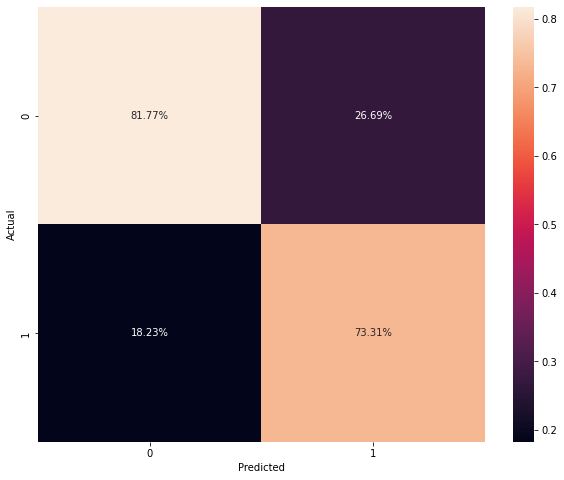

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_train)
predictions_log = pd.DataFrame({'Actual' : y_train, 'Predicted' : y_pred_log})

cf_matrix = pd.crosstab(predictions_log['Actual'], predictions_log['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.show()

#### Random Forest Classifier

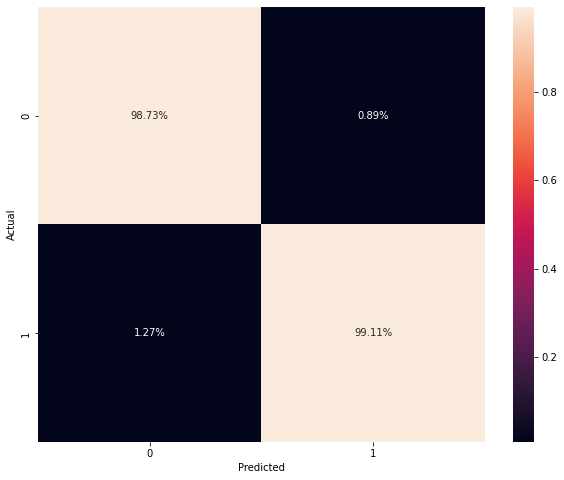

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc_predict = rfc.predict(X_train)
predictions_rfc = pd.DataFrame({'Actual' : y_train, 'Predicted' : y_rfc_predict})

cf_matrix = pd.crosstab(predictions_rfc['Actual'], predictions_rfc['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.show()

#### K Nearest Neigbors Classifier

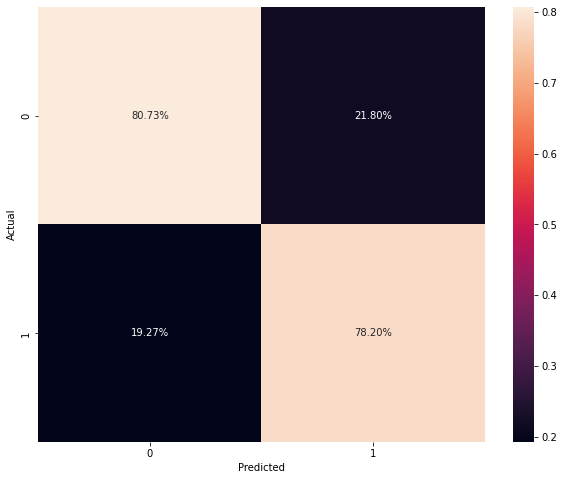

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn_predict = knn.predict(X_train)
predictions_knn = pd.DataFrame({'Actual' : y_train, 'Predicted' : y_knn_predict})

cf_matrix = pd.crosstab(predictions_knn['Actual'], predictions_knn['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.show()

#### Decision Tree Classifier

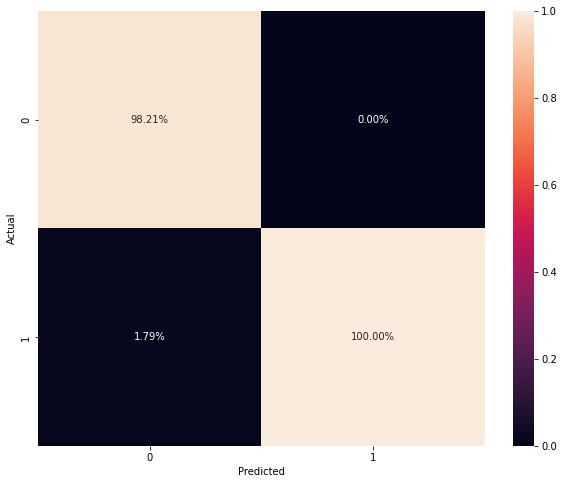

In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_dtc_predict = dtc.predict(X_train)
predictions_dtc = pd.DataFrame({'Actual' : y_train, 'Predicted' : y_dtc_predict})

cf_matrix = pd.crosstab(predictions_dtc['Actual'], predictions_dtc['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.show()

**Observations**
* Based from the confustion matrix figures above, the model using Decision Tree Classifier has the highest accuracy, since it has a 98.21% True Negative, and 100% True Positive.
* The logistic regression model has the lowest accuracy.
* The Random Forest Classifier model also yields a great result.
* KNN model is doable, my assumptions is it will yield better results if we band age and fare.

**Decisions**
* Consider using Feature scaling anc check if the accuracy improves.
* Check for the accuracy score for each model.

In [32]:
acc_log = log_reg.score(X_train, y_train) * 100
acc_rfc = rfc.score(X_train, y_train) * 100
acc_knn = knn.score(X_train, y_train) * 100
acc_dtc = dtc.score(X_train, y_train) * 100

models = ['Logistic Regression', 'Random Forest Classifer', 'K-Nearest Neigbor', 'Decision Tree Classifier']
scores = [acc_log, acc_rfc, acc_knn, acc_dtc]

acc_results = pd.DataFrame({'Model' : models,
                           'Scores' : scores})
acc_results = acc_results.sort_values(by = 'Scores', ascending = False).reset_index(drop = True)

fig = px.histogram(acc_results, x = 'Model', y = 'Scores', text_auto = True,
                   barmode = 'group', title = 'Evaluation of model scores')
fig.show()

## Conclusion

In conlcusion, after the data anaylsis and model training, two classifiers have a 98% accuracy score, Random Forest Classifier and Decision Tree Classifier. In addition, we try to exclude or delete unnecessary features for the models to yield better results. However, the accuracy rating is for the Train dataset, we haven't actually tried it to Test dataset. With this, I do believe that the accuracy scores will be much lower.

## Importing to submission.csv

In [33]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Survived' : dtc.predict(X_test)
})
submission.to_csv('./submission.csv', index = False)

**References**
* https://www.kaggle.com/code/andrej0marinchenko/titanic-data-science-solutions-upd
* https://www.kaggle.com/code/aiquanhuy/titanic-simple-solution